In [1]:
import os
import pickle

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import GradientBoostingRegressor


In [2]:
pd.set_option("display.max_columns", None)
pd.set_option("max_colwidth", None)

In [3]:
DATA_FOLDER = "./msi2021-data-science/data/"

train_path = os.path.join(DATA_FOLDER, "train.csv")
test_path = os.path.join(DATA_FOLDER, "test.csv")

data = pd.read_csv(train_path)
X_final = pd.read_csv(test_path)

In [4]:
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,Gas

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
corr_matrix = data.corr()
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

We can see, that dataset have many high correlating features. Later we will use Random Forest or Decision Tree for prove this results. Also, we will check not only numerical attrubutes. Lets plot with a few best features. 

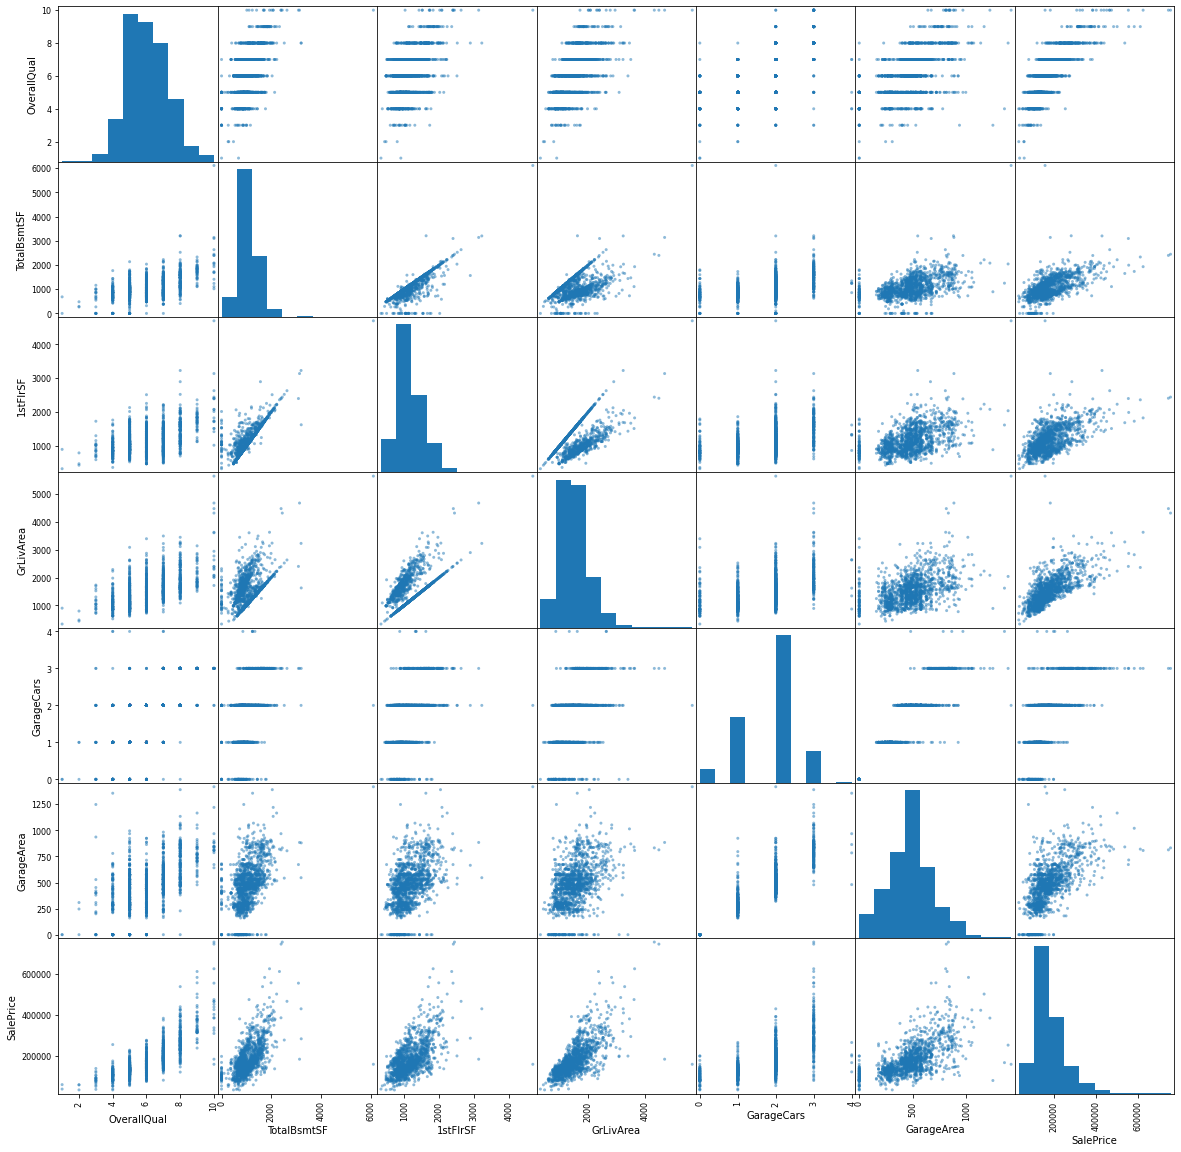

In [8]:
from pandas.plotting import scatter_matrix

best_corr_attributes = [name for name in corr_matrix.keys()
              if np.fabs(corr_matrix["SalePrice"].loc[name]) >= 0.6]

scatter_matrix(data[best_corr_attributes], figsize=(20, 20))
plt.show()

# Preparing data for algorithms

In [9]:
train, test = train_test_split(data, test_size=0.2)

In [10]:
drop_na = ["GarageType", "GarageYrBlt", "GarageFinish", "GarageQual", "GarageCond", "LotFrontage",
                        "MasVnrType", "MasVnrArea", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1",
                        "BsmtFinType2","Electrical"]
drop_columns = ["Alley", "FireplaceQu", "PoolQC", "Fence", "MiscFeature"]

class DataCleaner(BaseEstimator, TransformerMixin):
    """
    This class remove empty rows or columns
    
    Methods:
    fit(X, y=None):
        Return self object
        
    transform(X):
        Remove rows and columns in X
    
    """
    def __init__(self, drop_na, drop_columns):
        """
        Parameters
        drop_na : list
            Column names in which rows with cells that contains N/A will be deleted
        
        drop_columns : list 
            Column names that must be deleted
        
        """
        self._drop_na = drop_na
        self._drop_columns = drop_columns
   
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        """
        Remove columns and rows by params that you passed in constrictor 
        
        Parameters
        X : pandas.core.frame.DataFrame
            Input data
            
        Returns
        pandas.core.frame.DataFrame
            Data with removed rows and cols that you passed in constrictor 
        """
        
        new_X = X.drop(self._drop_columns, axis=1)
        new_X = new_X.dropna(subset=self._drop_na)
        
        return new_X

In [11]:
train_temp = train.copy()

train_temp = DataCleaner(drop_na, drop_columns).fit_transform(train_temp)
train_temp.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
965,966,60,RL,65.0,10237,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,RRAn,Norm,1Fam,2Story,6,5,2005,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,783,783,GasA,Ex,Y,SBrkr,783,701,0,1484,0,0,2,1,3,1,Gd,8,Typ,1,Attchd,2005.0,Fin,2,393,TA,TA,Y,0,72,0,0,0,0,0,7,2007,New,Partial,178900
621,622,60,RL,90.0,10800,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,6,7,1974,1997,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,956,Rec,182,384,1522,GasA,TA,Y,SBrkr,1548,1066,0,2614,0,0,2,1,4,1,TA,9,Typ,1,Attchd,1974.0,RFn,2,624,TA,TA,Y,38,243,0,0,0,0,0,6,2008,WD,Normal,240000
429,430,20,RL,130.0,11457,Pave,IR1,Lvl,AllPub,Corner,Gtl,Timber,Norm,Norm,1Fam,1Story,6,5,1988,1988,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,Gd,TA,Mn,GLQ,1005,Unf,0,387,1392,GasA,TA,Y,SBrkr,1412,0,0,1412,1,0,2,0,3,1,Gd,6,Typ,1,Attchd,1988.0,Unf,2,576,TA,TA,Y,0,0,169,0,0,0,0,3,2009,WD,Normal,175000
1374,1375,60,FV,85.0,10625,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,5,2005,2005,Gable,CompShg,CemntBd,CmentBd,None,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1026,1026,GasA,Ex,Y,SBrkr,1026,932,0,1958,0,0,2,1,3,1,Gd,9,Typ,1,Attchd,2005.0,Fin,3,936,TA,TA,Y,154,210,0,0,0,0,0,7,2008,WD,Normal,250000
45,46,120,RL,61.0,7658,Pave,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,TwnhsE,1Story,9,5,2005,2005,Hip,CompShg,MetalSd,MetalSd,BrkFace,412.0,Ex,TA,PConc,Ex,TA,No,GLQ,456,Unf,0,1296,1752,GasA,Ex,Y,SBrkr,1752,0,0,1752,1,0,2,0,2,1,Ex,6,Typ,1,Attchd,2005.0,RFn,2,576,TA,TA,Y,196,82,0,0,0,0,0,2,2010,WD,Normal,319900


In [12]:
class DataColumnSplitter(BaseEstimator, TransformerMixin):
    """
    This class stplit input data to data without column that you indicate (data_ field) and 
    indicated column (column_ filed)
    
    Attributes
    data_ : pandas.core.frame.DataFrame
        Inputed data without labels
        
    column_ : pandas.core.series.Series
        Removed column
    
    target_column_ : str 
        Name of column that you indicate
    
    Methods
    fit(X, y=None)
        Return self object 
        
    transfrom(X)
        Remove selected column from DataFrame and save removed column in calss field named column_
    """
    def __init__(self, target_column):
        """
        Parameters:
        target_column : str
            Name of column
        """
        self.target_column_ = target_column
        self.data_ = None
        self.column_ = None
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        """
        Remove selected column from DataFrame and save removed column in calss field named column_
        
        Parameters
        X : pandas.core.frame.DataFrame
            Input data
        
        Returns
        pandas.core.frame.DataFrame
            Data without selected column 
        """
        
        if self.target_column_ in X.columns:
            data = X.drop(self.target_column_, axis=1)
            self.column_ = X[self.target_column_].copy()
            self.data_ = data
        else:
            self.data_ = X
        return self.data_

In [13]:
X_train, y_train = None, None

dcs = DataColumnSplitter("SalePrice")
X_train = dcs.fit_transform(train_temp)
y_train = dcs.column_

In [14]:
X_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
965,966,60,RL,65.0,10237,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,RRAn,Norm,1Fam,2Story,6,5,2005,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,783,783,GasA,Ex,Y,SBrkr,783,701,0,1484,0,0,2,1,3,1,Gd,8,Typ,1,Attchd,2005.0,Fin,2,393,TA,TA,Y,0,72,0,0,0,0,0,7,2007,New,Partial
621,622,60,RL,90.0,10800,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,6,7,1974,1997,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,956,Rec,182,384,1522,GasA,TA,Y,SBrkr,1548,1066,0,2614,0,0,2,1,4,1,TA,9,Typ,1,Attchd,1974.0,RFn,2,624,TA,TA,Y,38,243,0,0,0,0,0,6,2008,WD,Normal
429,430,20,RL,130.0,11457,Pave,IR1,Lvl,AllPub,Corner,Gtl,Timber,Norm,Norm,1Fam,1Story,6,5,1988,1988,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,Gd,TA,Mn,GLQ,1005,Unf,0,387,1392,GasA,TA,Y,SBrkr,1412,0,0,1412,1,0,2,0,3,1,Gd,6,Typ,1,Attchd,1988.0,Unf,2,576,TA,TA,Y,0,0,169,0,0,0,0,3,2009,WD,Normal
1374,1375,60,FV,85.0,10625,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,5,2005,2005,Gable,CompShg,CemntBd,CmentBd,None,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1026,1026,GasA,Ex,Y,SBrkr,1026,932,0,1958,0,0,2,1,3,1,Gd,9,Typ,1,Attchd,2005.0,Fin,3,936,TA,TA,Y,154,210,0,0,0,0,0,7,2008,WD,Normal
45,46,120,RL,61.0,7658,Pave,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,TwnhsE,1Story,9,5,2005,2005,Hip,CompShg,MetalSd,MetalSd,BrkFace,412.0,Ex,TA,PConc,Ex,TA,No,GLQ,456,Unf,0,1296,1752,GasA,Ex,Y,SBrkr,1752,0,0,1752,1,0,2,0,2,1,Ex,6,Typ,1,Attchd,2005.0,RFn,2,576,TA,TA,Y,196,82,0,0,0,0,0,2,2010,WD,Normal


In [15]:
y_train

965     178900
621     240000
429     175000
1374    250000
45      319900
         ...  
1456    210000
1062     90000
1302    290000
1204    153500
83      126500
Name: SalePrice, Length: 878, dtype: int64

In [16]:
def get_better_numeric_columns(importances_features, threshold):
    """
    Leaves the best attributes, by threshold
    
    Parameters
    importances_features : pandas.core.frame.DataFrame
        Table with indices as data column names and importances values in first column for all indices 
        
    threshold : float 
        All rows whose importances values are less that threshold will be removed
        
    Returns
    list 
        Column names whose importances values are gtrater that threshold
    
    """
    sorted_features = importances_features.sort_values(ascending=False)
    columns = None
    
    if isinstance(threshold, float) and 0. < threshold < 1.:
        columns = [name for name in sorted_features.index if sorted_features.loc[name] > threshold]
    
    elif isinstance(threshold, int) and threshold > 0:
        columns = sorted_features.iloc[:threshold].index
        
    elif isinstance(threshold, float) and not 0. < threshold < 1.:
        raise ValueError("Threshold as float must be in segment (0, 1)")
        
    elif isinstance(threshold, float) and threshold <= 0:
        raise ValueError("Threshold as int must be positive (> 0)")
        
    else:
        raise ValueError("Invalid variable 'threshold' data type. It must be int or float")
        
    return list(columns)

class BestAttributesSelector(BaseEstimator, TransformerMixin):
    """
    Select best attributes by corr matrix, tree, random forest or other
    
    Methods
    fit(X, y=None)
        Return self
        
    transform(self, X)
        Select best attrubutes
    """
    
    def __init__(self, importance_attrs, numbersonly=False):
        """
        Patameters
        importance_attrs : list
            List with most importance column names
            
        """
        self._importance_attrs = importance_attrs
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        """
        Select best attributes in input series
        
        Patameters
        X : pandas.core.frame.DataFrame
            Input data 
        
        Returns
        pandas.core.frame.DataFrame
            DataFrame with best attributes            
        """
        new_X = X[self._importance_attrs]
            
        return new_X
        

In [17]:
get_better_numeric_columns(corr_matrix["SalePrice"], 5)

['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea']

In [18]:
class ColumnNamesSaver(BaseEstimator, TransformerMixin):
    """
    Save column names
    
    Attributes
    column_names_ : list
        Column names
    
    Methods
    fit(X, y=None)
        Return self
        
    transform(self, X)
        Save column names 
    """
    def __init__(self):
        self.column_names_ = None
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        """
        Save column names
        
        Parameters
        X : pandas.core.frame.DataFrame
            Input data 
            
        Returns
        X : pandas.core.frame.DataFrame
            Not transformed input data
        """
        self.column_names_ = list(X.columns)
        return X

In [19]:
class CathgoricalEncoder(BaseEstimator, TransformerMixin):
    """
    Transform cathegorical attributes to numerical columns
    
    Methods
    fit(X, y=None)
        Return self
    
    transfrom(X)
        Transfrom cathegorical attributes to numerical columns
    """
    def __init__(self):
        self._encoder = OneHotEncoder()
        
    def fit(self, X, y = None):
        return self
    
    def transform(self, X):
        """
        Select cathegirical attributes from input DataFrame, use sklearn.OneHotEncoder to transfrom data and 
        merge transfromed data with numerical attributes
        
        Parameters
        X : pandas.core.frame.DataFrame
            Input data
            
        Returns
        pandas.core.frame.DataFrame
            Prepared data
        """
        cat_attributes = [name for name in X.dtypes.keys() 
                  if str(X[name].dtype) == "object"]
        
        cat_matrix = self._encoder.fit_transform(X[cat_attributes])
        encoded_part = pd.DataFrame(cat_matrix.toarray(), columns=self._get_new_column_names(cat_matrix, cat_attributes, self._encoder))
        
        new_X = X.drop(cat_attributes, axis=1)
        new_X.reset_index(drop=True, inplace=True)
        encoded_part.reset_index(drop=True, inplace=True)
        
        new_X = pd.concat([new_X, encoded_part], axis=1)
        
        return new_X
            
    @staticmethod
    def _get_new_column_names(matrix, cathegorical_attributes, encoder):
        new_column_names = []
        for column_name, values in zip(cathegorical_attributes, encoder.categories_):
            for value in values:
                new_column_names.append(f"{column_name}_{value}")
        return new_column_names
        

In [20]:
ce = CathgoricalEncoder().fit_transform(X_train)
ce.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLan

In [21]:
oe = OrdinalEncoder()
print(X_train.shape)
encoded = oe.fit_transform(X_train)

(878, 75)


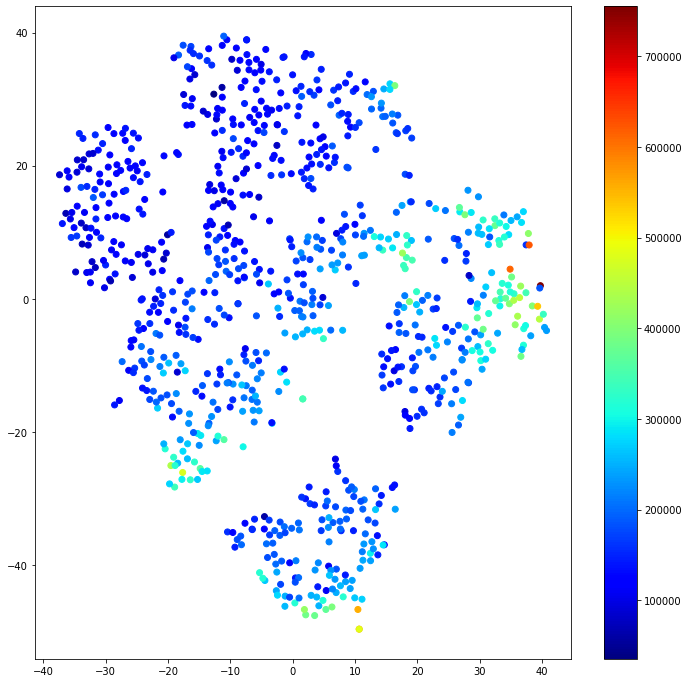

In [22]:
tsne = TSNE(n_components=2)
X_reduced_tsne = tsne.fit_transform(encoded)

plt.figure(figsize=(12, 12))
plt.scatter(X_reduced_tsne[:, 0], X_reduced_tsne[:, 1], c=y_train, cmap="jet")
plt.colorbar()
plt.show()
                                       

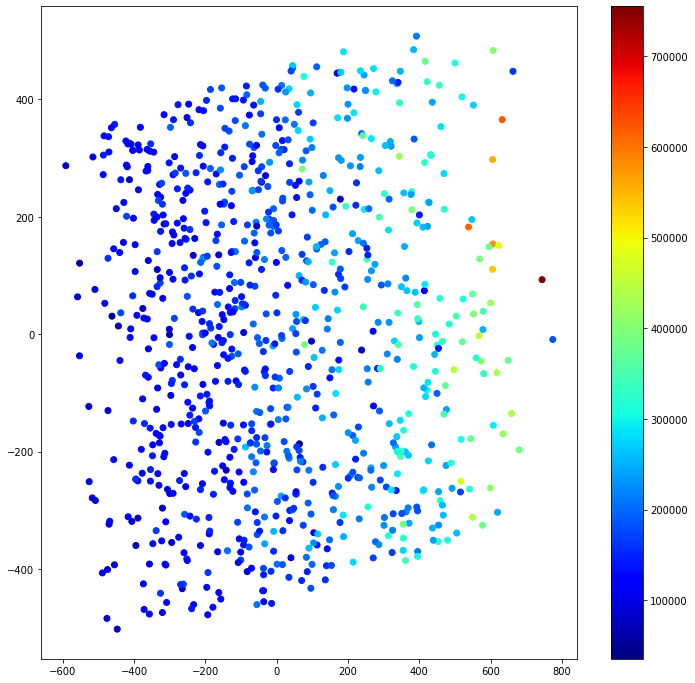

In [23]:
pca = PCA(n_components=2)
X_reduced_pca = pca.fit_transform(encoded)

plt.figure(figsize=(12, 12))
plt.scatter(X_reduced_pca[:, 0], X_reduced_pca[:, 1], c=y_train, cmap="jet")
plt.colorbar()
plt.show()

Many vectors of expensive houses concentrated near. The farther from the core of concentration, then home is more expensive. This fact confirm correlation. (For numerical attributes)

In [24]:
X_train, y_train = None, None

pipeline = Pipeline([
    ("cleaner", DataCleaner(drop_na, drop_columns)),
    ("labels_splitter", DataColumnSplitter("SalePrice")),
    ("encoder", CathgoricalEncoder()),
    ("scaler", StandardScaler())
])

X_train = pipeline.fit_transform(train)
y_train = pipeline.named_steps["labels_splitter"].column_

X_test = pipeline.fit_transform(test)
y_test = pipeline.named_steps["labels_splitter"].column_

In [25]:
X_train.shape

(878, 259)

In [26]:
X_test.shape

(216, 219)

Oh no, we are losing some cathegorical attributes in test set. We have 3 ways: 
1) Hardcode some magical constant (list with all cathegorical attributes, and fill empty columns zeros)

2) Delete cahtegorical attributes with many cathegories. 

3) Try OriginalEncoder

We have wery small dataset and too many attributes. So, at the first lets try to change OneHotEncoder. Many algorithms are sensetives to attributes, for example, a neighbor with a good attribute will also be considered good. So, OneHotEncoder will be better, but, they create many atributes...... So we not have a choise.... 

In [27]:
def remove_column(data, column_name):
    """
    Remove column by name
    
    Parameters
    data : list
        Column names
    column_name : str
        Column name that must be deleted 
        
    Returns 
    list 
        data without selected name
    """
    if column_name in data:
        data.remove(column_name)

In [28]:
X_train, y_train = None, None

column_names = None

best_attributes = get_better_numeric_columns(corr_matrix["SalePrice"], 0.3)
remove_column(best_attributes, "SalePrice")
remove_column(best_attributes, "Id")
# best_attributes += ["Neighborhood", "GarageType", "BsmtQual", "WoodDeckSF", "MasVnrArea"]

best_attributes += ["Neighborhood", "GarageType", "BsmtQual"]

pipeline = Pipeline([
    ("cleaner", DataCleaner(drop_na, drop_columns)),
    ("labels_splitter", DataColumnSplitter("SalePrice")),
    ("id_splitter", DataColumnSplitter("Id")),
    ("best_selecter", BestAttributesSelector(best_attributes)),
    ("column_names_saver", ColumnNamesSaver()),
    ("encoder", OrdinalEncoder()),
    ("scaler", StandardScaler())
])

X_train = pipeline.fit_transform(train)
y_train = pipeline.named_steps["labels_splitter"].column_

X_test, y_test = None, None
X_test = pipeline.fit_transform(test)
y_test = pipeline.named_steps["labels_splitter"].column_

column_names = pipeline.named_steps["column_names_saver"].column_names_

In [29]:
X_train.shape, y_train.shape

((878, 21), (878,))

In [30]:
X_test.shape, y_test.shape

((216, 21), (216,))

# Model selection

In our dataset we have small amount of instances and attributes, so all models will be fast.

We have regression problem, so we need to calculate distance between prediction and label vectors. For this goal we can use Mean Absolute Error, or Root Mean Squared Error. This two functions most useful in regression problems.

If we use RMSE, then we must minimize this function, because RMSE return heigher value for large error value (use Euclidian norm).
If we know, that dataset have many outlier, that we can use MAE (use Manhettan norm). RMSE more sensitive to outlies taht MAE. 

Looking at plot with best correlationg features, we can see, that we have some outlies, but not more. So, we will use RMSE.

In [31]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_predictions = lin_reg.predict(X_test)

lin_mse = mean_squared_error(lin_predictions, y_test)
lin_rmse = np.sqrt(lin_mse)
lin_rmse



39404.84690783668

In [32]:
sgd_reg = SGDRegressor()

sgd_params = {
    "eta0": np.arange(0.001, 0.004, 0.0001)
}

sgd_grid_search = GridSearchCV(sgd_reg, sgd_params, scoring="neg_mean_squared_error", cv=4, 
                             return_train_score=True, n_jobs=-1)
sgd_grid_search.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=SGDRegressor(), n_jobs=-1,
             param_grid={'eta0': array([0.001 , 0.0011, 0.0012, 0.0013, 0.0014, 0.0015, 0.0016, 0.0017,
       0.0018, 0.0019, 0.002 , 0.0021, 0.0022, 0.0023, 0.0024, 0.0025,
       0.0026, 0.0027, 0.0028, 0.0029, 0.003 , 0.0031, 0.0032, 0.0033,
       0.0034, 0.0035, 0.0036, 0.0037, 0.0038, 0.0039])},
             return_train_score=True, scoring='neg_mean_squared_error')

In [33]:
sgd_grid_search.best_estimator_

SGDRegressor(eta0=0.002700000000000001)

In [34]:
sgd_results = sgd_grid_search.cv_results_
for mean, params in sorted(zip(sgd_results["mean_test_score"], sgd_results["params"]), reverse=True, key=lambda x: x[0])[:10]:
    print(np.sqrt(-mean), params)


36994.72631333194 {'eta0': 0.002700000000000001}
37004.31821847448 {'eta0': 0.003200000000000001}
37016.111822182225 {'eta0': 0.002800000000000001}
37017.06071801622 {'eta0': 0.0039000000000000016}
37017.20925029402 {'eta0': 0.003100000000000001}
37019.82404425921 {'eta0': 0.0018000000000000004}
37022.103826862054 {'eta0': 0.0016000000000000003}
37024.38324526432 {'eta0': 0.0022000000000000006}
37029.87101654565 {'eta0': 0.0014000000000000002}
37030.3860922398 {'eta0': 0.002300000000000001}


In [35]:
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, y_train)
forest_predictions = forest_reg.predict(X_test)

forest_mse = mean_squared_error(forest_predictions, y_test)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

33645.06927132211

In [36]:
forest_reg.feature_importances_

array([0.58823225, 0.11004969, 0.0082771 , 0.01660683, 0.02723705,
       0.02355151, 0.04106352, 0.02031146, 0.01715481, 0.01422024,
       0.00875766, 0.01160133, 0.0046584 , 0.03395242, 0.01675045,
       0.00652791, 0.02578713, 0.00791443, 0.00830762, 0.00389306,
       0.00514512])

In [37]:
dtypes = [str(name) for name in data[column_names].dtypes] 

for (dtype, name), importance in sorted(
                                zip(zip(dtypes, column_names), forest_reg.feature_importances_), 
                                reverse=True, 
                                key=lambda x: x[1]):
    print(f"{dtype}\t{name} \t-> {importance}")
    


int64	OverallQual 	-> 0.5882322514896561
int64	GrLivArea 	-> 0.11004968985362837
int64	FullBath 	-> 0.04106352286343453
int64	BsmtFinSF1 	-> 0.03395241955154119
int64	TotalBsmtSF 	-> 0.02723705469307356
int64	2ndFlrSF 	-> 0.025787129794985555
int64	1stFlrSF 	-> 0.0235515055510849
int64	TotRmsAbvGrd 	-> 0.02031145953124797
int64	YearBuilt 	-> 0.01715481344790636
float64	LotFrontage 	-> 0.016750445812492843
int64	GarageArea 	-> 0.01660683072203185
int64	YearRemodAdd 	-> 0.014220236499537879
float64	MasVnrArea 	-> 0.011601326974580495
float64	GarageYrBlt 	-> 0.008757660976443107
object	Neighborhood 	-> 0.008307619852309819
int64	GarageCars 	-> 0.008277100861151668
int64	OpenPorchSF 	-> 0.007914431991969203
int64	WoodDeckSF 	-> 0.006527912649930745
object	BsmtQual 	-> 0.005145120543566297
int64	Fireplaces 	-> 0.00465840283317669
object	GarageType 	-> 0.0038930635062509166


In [38]:
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [39]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)
tree_predictions = tree_reg.predict(X_test)

tree_mse = mean_squared_error(tree_predictions, y_test)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

55807.300247393956

In [40]:
tree_reg = DecisionTreeRegressor()

tree_params = {
    "min_samples_leaf": np.arange(1, 10, 1),
    "max_leaf_nodes": np.arange(50, 100, 2),
    "max_depth": np.arange(5, 15, 1),
    "max_features": np.arange(1, 10, 1),
    
}

tree_search = GridSearchCV(tree_reg, tree_params, scoring="neg_mean_squared_error", cv=4, 
                           return_train_score=True, n_jobs=-1)
tree_search.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'max_features': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_leaf_nodes': array([50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82,
       84, 86, 88, 90, 92, 94, 96, 98]),
                         'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
             return_train_score=True, scoring='neg_mean_squared_error')

In [41]:
tree_results = tree_search.cv_results_
for neg_mean, params in sorted(zip(tree_results["mean_test_score"], tree_results["params"]), key=lambda x: x[0], reverse=True)[:10]:
    print(np.sqrt(-neg_mean), params)

38606.112750110624 {'max_depth': 11, 'max_features': 9, 'max_leaf_nodes': 76, 'min_samples_leaf': 6}
38644.470198613475 {'max_depth': 10, 'max_features': 6, 'max_leaf_nodes': 82, 'min_samples_leaf': 8}
38718.16504550667 {'max_depth': 12, 'max_features': 9, 'max_leaf_nodes': 76, 'min_samples_leaf': 2}
38753.61181033075 {'max_depth': 12, 'max_features': 7, 'max_leaf_nodes': 78, 'min_samples_leaf': 8}
38857.20067171636 {'max_depth': 11, 'max_features': 7, 'max_leaf_nodes': 88, 'min_samples_leaf': 4}
39003.50273130473 {'max_depth': 7, 'max_features': 9, 'max_leaf_nodes': 52, 'min_samples_leaf': 7}
39007.33269771466 {'max_depth': 6, 'max_features': 9, 'max_leaf_nodes': 82, 'min_samples_leaf': 4}
39018.18211249786 {'max_depth': 13, 'max_features': 9, 'max_leaf_nodes': 72, 'min_samples_leaf': 9}
39074.179146271956 {'max_depth': 7, 'max_features': 8, 'max_leaf_nodes': 94, 'min_samples_leaf': 7}
39142.51799601221 {'max_depth': 6, 'max_features': 7, 'max_leaf_nodes': 50, 'min_samples_leaf': 2}


In [42]:
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, y_train)
forest_predictions = forest_reg.predict(X_test)

forest_mse = mean_squared_error(forest_predictions, y_test)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

35542.43865830903

In [43]:
forest_reg = RandomForestRegressor()

forest_params = {
    "n_estimators": np.arange(1, 300, 5),
    "max_features": np.arange(1, 15, 1),
    "min_samples_leaf": np.arange(1, 10, 1),
    "max_leaf_nodes": np.arange(2, 100, 1),
}

forest_search = RandomizedSearchCV(forest_reg, forest_params, n_iter=1000, scoring="neg_mean_squared_error", cv=4, 
                             return_train_score=True, n_jobs=-1)
forest_search.fit(X_train, y_train)

RandomizedSearchCV(cv=4, estimator=RandomForestRegressor(), n_iter=1000,
                   n_jobs=-1,
                   param_distributions={'max_features': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'max_leaf_nodes': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       53, 54, 55, 56, 57, 58, 59, 60...
       87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                                        'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'n_estimators': array([  1,   6,  11,  16,  21,  26,  31,  36,  41,  46,  51,  56,  61,
        66,  71,  76,  81,  86,  91,  96, 101, 106, 111, 116, 121, 126,
       131, 136, 141, 146, 151, 156, 161, 166, 171, 176, 181, 186, 191,
       196, 201, 206, 2

In [44]:
forest_results = forest_search.cv_results_
for mean, params in sorted(zip(forest_results["mean_test_score"], forest_results["params"]), key=lambda x: x[0], reverse=True)[:10]:
    print(np.sqrt(-mean), params)

32332.883909712382 {'n_estimators': 211, 'min_samples_leaf': 1, 'max_leaf_nodes': 82, 'max_features': 13}
32374.79879517793 {'n_estimators': 36, 'min_samples_leaf': 1, 'max_leaf_nodes': 85, 'max_features': 11}
32445.063016777378 {'n_estimators': 71, 'min_samples_leaf': 1, 'max_leaf_nodes': 88, 'max_features': 12}
32458.666252668456 {'n_estimators': 166, 'min_samples_leaf': 1, 'max_leaf_nodes': 57, 'max_features': 9}
32485.758419087906 {'n_estimators': 266, 'min_samples_leaf': 1, 'max_leaf_nodes': 97, 'max_features': 5}
32586.466475484063 {'n_estimators': 91, 'min_samples_leaf': 1, 'max_leaf_nodes': 95, 'max_features': 8}
32607.29412467637 {'n_estimators': 246, 'min_samples_leaf': 1, 'max_leaf_nodes': 52, 'max_features': 14}
32630.50291754739 {'n_estimators': 131, 'min_samples_leaf': 1, 'max_leaf_nodes': 72, 'max_features': 9}
32644.38933035375 {'n_estimators': 66, 'min_samples_leaf': 1, 'max_leaf_nodes': 40, 'max_features': 7}
32687.17644824022 {'n_estimators': 261, 'min_samples_leaf':

In [45]:
svm_reg = SVR()
svm_reg.fit(X_train, y_train)
svm_predictions = svm_reg.predict(X_test)

svm_mse = mean_squared_error(svm_predictions, y_test)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

87023.67584778993

In [46]:
svm_reg = SVR()

svm_params = [
        
    {
        'kernel': ['linear'], 
        'C': np.arange(35000, 37000, 10)
    },
        
    {
        'kernel': ['rbf'], 
        'C': np.arange(9000, 10000, 50),
        'gamma': np.arange(0.001, 0.03, 0.005)
    },
]

svm_search = GridSearchCV(svm_reg, svm_params, cv=4, scoring='neg_mean_squared_error', n_jobs=-1)
svm_search.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=SVR(), n_jobs=-1,
             param_grid=[{'C': array([35000, 35010, 35020, 35030, 35040, 35050, 35060, 35070, 35080,
       35090, 35100, 35110, 35120, 35130, 35140, 35150, 35160, 35170,
       35180, 35190, 35200, 35210, 35220, 35230, 35240, 35250, 35260,
       35270, 35280, 35290, 35300, 35310, 35320, 35330, 35340, 35350,
       35360, 35370, 35380, 35390, 35400, 35410, 35420, 35430, 35440,
       35450, 35460,...
       36800, 36810, 36820, 36830, 36840, 36850, 36860, 36870, 36880,
       36890, 36900, 36910, 36920, 36930, 36940, 36950, 36960, 36970,
       36980, 36990]),
                          'kernel': ['linear']},
                         {'C': array([9000, 9050, 9100, 9150, 9200, 9250, 9300, 9350, 9400, 9450, 9500,
       9550, 9600, 9650, 9700, 9750, 9800, 9850, 9900, 9950]),
                          'gamma': array([0.001, 0.006, 0.011, 0.016, 0.021, 0.026]),
                          'kernel': ['rbf']}],
             scoring='neg_mean_squar

In [47]:
svm_results = svm_search.cv_results_
for neg_mean, params in sorted(zip(svm_results["mean_test_score"], svm_results["params"]), reverse=True, key=lambda x: x[0])[:10]:
    print(np.sqrt(-neg_mean), params)

37830.43817857638 {'C': 36990, 'kernel': 'linear'}
37830.43822357741 {'C': 36960, 'kernel': 'linear'}
37830.438236216556 {'C': 36940, 'kernel': 'linear'}
37830.438241229196 {'C': 36950, 'kernel': 'linear'}
37830.438280162816 {'C': 36920, 'kernel': 'linear'}
37830.43830373701 {'C': 36900, 'kernel': 'linear'}
37830.43830694255 {'C': 36880, 'kernel': 'linear'}
37830.43834921379 {'C': 36980, 'kernel': 'linear'}
37830.438349719756 {'C': 36860, 'kernel': 'linear'}
37830.43835137828 {'C': 36970, 'kernel': 'linear'}


In [48]:
svm_reg = SVR(**svm_search.best_params_)
tree_reg = DecisionTreeRegressor(**tree_search.best_params_)

voting_reg = VotingRegressor(
    estimators=[("svr", svm_reg), ("tree", tree_reg)]
)

voting_reg.fit(X_train, y_train)

voting_predictions = voting_reg.predict(X_test)
voting_mse = mean_squared_error(voting_predictions, y_test)
voting_rmse = np.sqrt(voting_mse)
voting_rmse

36360.63444781546

In [49]:
gbrt = GradientBoostingRegressor(**tree_search.best_params_)

gbrt_params = {
    "n_estimators": np.arange(1, 20, 5),
    "learning_rate": np.arange(0.1, 1.1, 0.1)
}

gbrt_search = GridSearchCV(gbrt, gbrt_params, cv=4, scoring='neg_mean_squared_error', n_jobs=-1)
gbrt_search.fit(X_train, y_train)

GridSearchCV(cv=4,
             estimator=GradientBoostingRegressor(max_depth=11, max_features=9,
                                                 max_leaf_nodes=76,
                                                 min_samples_leaf=6),
             n_jobs=-1,
             param_grid={'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                         'n_estimators': array([ 1,  6, 11, 16])},
             scoring='neg_mean_squared_error')

In [50]:
gbrt_results = gbrt_search.cv_results_
for neg_mean, params in sorted(zip(gbrt_results["mean_test_score"], gbrt_results["params"]), reverse=True, key=lambda x: x[0])[:10]:
    print(np.sqrt(-neg_mean), params)

33537.89400598131 {'learning_rate': 0.2, 'n_estimators': 16}
34344.60063157056 {'learning_rate': 0.2, 'n_estimators': 11}
34660.10611490735 {'learning_rate': 0.30000000000000004, 'n_estimators': 11}
34728.67668878038 {'learning_rate': 0.4, 'n_estimators': 16}
35156.68872817922 {'learning_rate': 0.4, 'n_estimators': 6}
35510.783950863624 {'learning_rate': 0.30000000000000004, 'n_estimators': 16}
35921.18230331537 {'learning_rate': 0.30000000000000004, 'n_estimators': 6}
36614.38298823303 {'learning_rate': 0.1, 'n_estimators': 16}
37188.29115126182 {'learning_rate': 0.4, 'n_estimators': 11}
37259.31791068092 {'learning_rate': 0.5, 'n_estimators': 6}


So, random forest is better estimator.

In [51]:
best_estimator = forest_search.best_estimator_

In [52]:
X_test, y_test = None, None
X_test = pipeline.fit_transform(data)
y_test = pipeline.named_steps["labels_splitter"].column_

best_estimator.fit(X_train, y_train)
best_estimator_predictions = best_estimator.predict(X_test)

best_estimator_mse = mean_squared_error(best_estimator_predictions, y_test)
best_estimator_rmse = np.sqrt(best_estimator_mse)
best_estimator_rmse

21382.912401353307

In [53]:
id_column = None

X_final_prepared = pipeline.fit_transform(X_final)
id_column = pipeline.named_steps["id_splitter"].column_

print(id_column)

0       1461
1       1462
2       1463
3       1464
4       1465
        ... 
1451    2912
1452    2913
1455    2916
1456    2917
1458    2919
Name: Id, Length: 1111, dtype: int64


In [54]:
y_final_pred = best_estimator.predict(X_final_prepared)
y_final_pred

array([127358.1140728 , 153112.6896274 , 180095.17425648, ...,
       108303.41865008, 153866.85982141, 256508.31296077])

In [55]:
y_final_pred.shape

(1111,)

In [56]:
results = pd.DataFrame({
    "Id": id_column,
    "SalePrice": y_final_pred
})
results

,Id,SalePrice
0,1461,127358.114073
1,1462,153112.689627
2,1463,180095.174256
3,1464,181726.435847
4,1465,216642.003449
...,...,...
1451,2912,152384.004743
1452,2913,110421.163725
1455,2916,108303.418650
1456,2917,153866.859821


In [57]:
results.to_csv("prediction.csv", index=False)